### Features
- **AT (Air Temperature)**: This can be used as an independent variable to analyze how temperature affects other variables.
- **V (Wind Speed/Velocity)**: Another feature that might influence outcomes related to weather or environment.
- **AP (Atmospheric Pressure)**: This could impact weather predictions and conditions.
- **RH (Relative Humidity)**: Often plays a crucial role in weather patterns and can affect various applications.

### Target Value
- **PE (Potential Evapotranspiration)**: This is likely the target variable you want to predict, as it is a derived measure influenced by the other features. It represents the amount of water that would evaporate and transpire under optimal conditions.



Data from first dataset:
                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000

Correlation Matrix for first dataset:
          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.51842

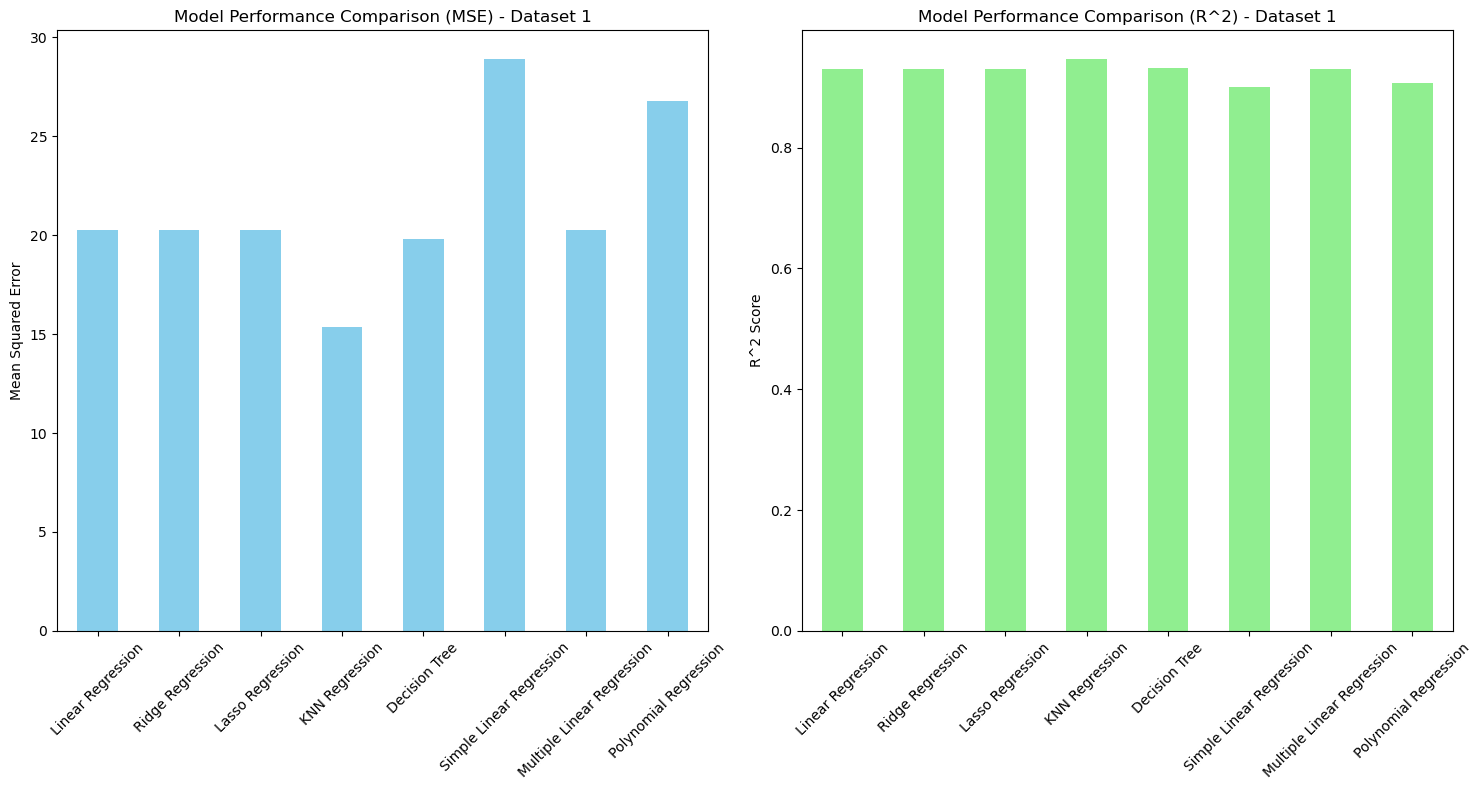

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the first dataset
file_path_1 = r'D:\Machine learning\task\data\Folds5x2_pp.xlsx'  # Replace with your actual file path
data = pd.read_excel(file_path_1)

# Display descriptive statistics and correlation matrix for the dataset
print("\nData from first dataset:")
print(data.describe())
print("\nCorrelation Matrix for first dataset:")
print(data.corr())

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
target_column = 'PE'  # Replace with your actual target column name
X1 = data.drop(columns=[target_column])  # Features
y1 = data[target_column]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results1 = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)

    mse1 = mean_squared_error(y_test, y_pred1)
    r21 = r2_score(y_test, y_pred1)
    results1[model_name] = {'MSE': mse1, 'R^2': r21}
    print(f"{model_name} (Dataset 1) - MSE: {mse1:.2f}, R^2: {r21:.2f}")

# Simple Linear Regression (Using one feature)
# Check available features and choose one
print("Available features:", X1.columns.tolist())  # Print available features
chosen_feature = 'AT'  # Replace 'AT' with an actual feature name from the printed list

simple_model = LinearRegression()
simple_model.fit(X_train[[chosen_feature]], y_train)  # Use the actual feature name
y_pred_simple = simple_model.predict(X_test[[chosen_feature]])
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)
results1['Simple Linear Regression'] = {'MSE': mse_simple, 'R^2': r2_simple}
print(f"Simple Linear Regression - MSE: {mse_simple:.2f}, R^2: {r2_simple:.2f}")

# Multiple Linear Regression (Using all features)
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
results1['Multiple Linear Regression'] = {'MSE': mse_multiple, 'R^2': r2_multiple}
print(f"Multiple Linear Regression - MSE: {mse_multiple:.2f}, R^2: {r2_multiple:.2f}")

# Polynomial Regression
degree = 2  # Adjust the degree of the polynomial as needed
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train[[chosen_feature]])  # Use the chosen feature
X_poly_test = poly.transform(X_test[[chosen_feature]])
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
results1['Polynomial Regression'] = {'MSE': mse_poly, 'R^2': r2_poly}
print(f"Polynomial Regression (degree={degree}) - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Prepare for plotting results
results_df1 = pd.DataFrame(results1).T

# Plot for dataset
plt.figure(figsize=(15, 8))

# Bar plot for MSE
plt.subplot(1, 2, 1)
results_df1['MSE'].plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Model Performance Comparison (MSE) - Dataset 1')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Bar plot for R^2
plt.subplot(1, 2, 2)
results_df1['R^2'].plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Model Performance Comparison (R^2) - Dataset 1')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Data Explanation

This dataset contains information related to advertising expenditures and their corresponding sales figures. The columns are as follows:

- **TV**: This column represents the amount spent on television advertising (in thousands of dollars). Television ads can significantly influence consumer behavior and drive sales.

- **radio**: This column indicates the expenditure on radio advertising (also in thousands of dollars). Radio advertising can target specific demographics and create brand awareness.

- **newspaper**: This column shows the amount spent on newspaper advertising (again, in thousands of dollars). Despite a decline in print media, newspapers still play a role in reaching certain audiences.

- **sales**: This is the target variable, representing the total sales (in thousands of units) influenced by the advertising expenditures in the previous columns. Analyzing this relationship can help understand how effective each advertising medium is in driving sales.



Data from first dataset:
               TV       radio   newspaper       sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   14.022500
std     85.854236   14.846809   21.778621    5.217457
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   10.375000
50%    149.750000   22.900000   25.750000   12.900000
75%    218.825000   36.525000   45.100000   17.400000
max    296.400000   49.600000  114.000000   27.000000

Correlation Matrix for first dataset:
                 TV     radio  newspaper     sales
TV         1.000000  0.054809   0.056648  0.782224
radio      0.054809  1.000000   0.354104  0.576223
newspaper  0.056648  0.354104   1.000000  0.228299
sales      0.782224  0.576223   0.228299  1.000000
Linear Regression (Dataset 1) - MSE: 3.17, R^2: 0.90
Ridge Regression (Dataset 1) - MSE: 3.17, R^2: 0.90
Lasso Regression (Dataset 1) - MSE: 3.14, R^2: 0.90
KNN Regression (Dataset 1) - MSE: 2.8

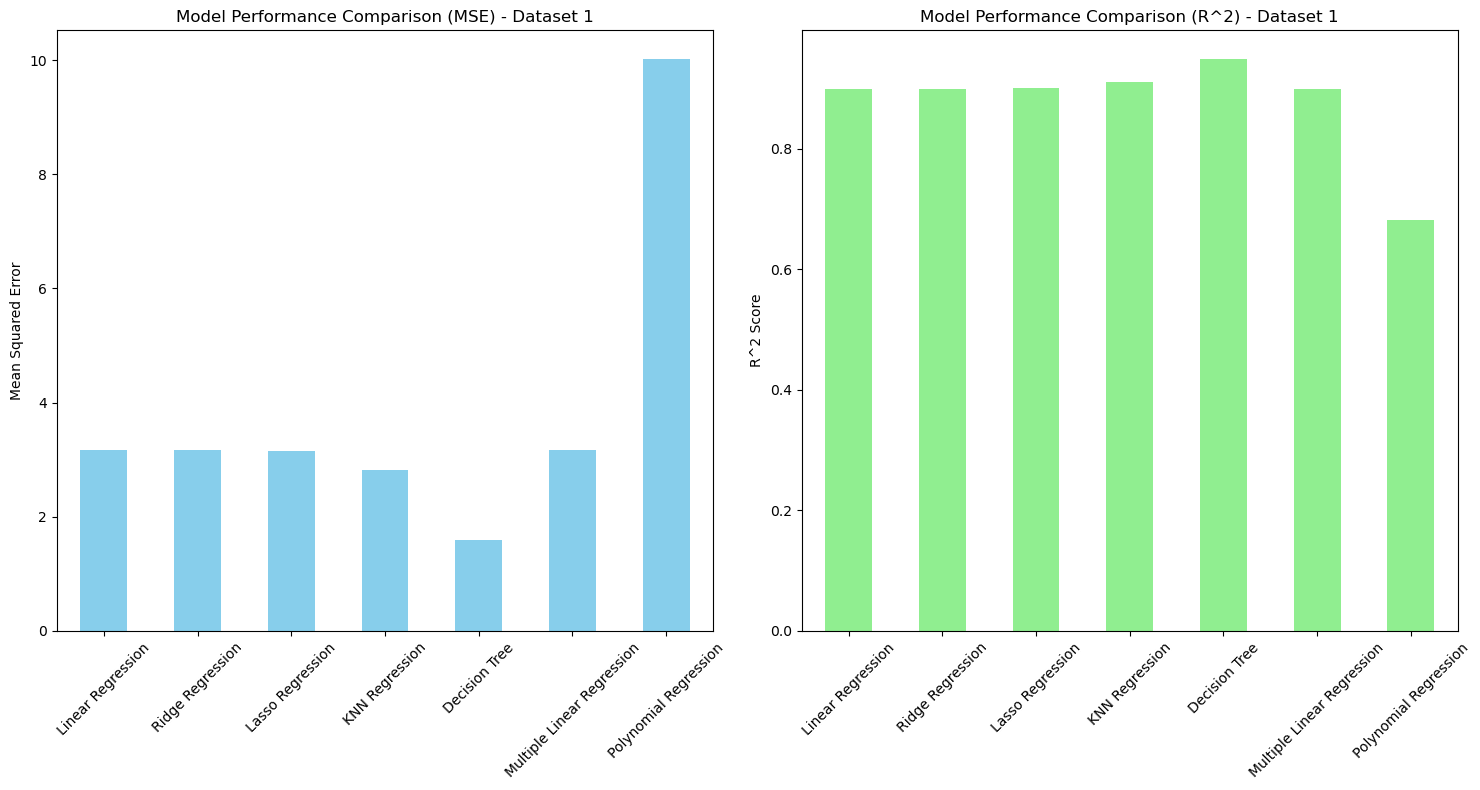

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the first dataset
file_path_1 = r'D:\Machine learning\task\data\Advertising.csv'  # Replace with your actual file path
data = pd.read_csv(file_path_1)

# Display descriptive statistics and correlation matrix for the dataset
print("\nData from first dataset:")
print(data.describe())
print("\nCorrelation Matrix for first dataset:")
print(data.corr())

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
target_column = 'sales'  # Replace with your actual target column name
X1 = data.drop(columns=[target_column])  # Features
y1 = data[target_column]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize models for the dataset
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results1 = {}

# Train and evaluate each model for the dataset
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)

    mse1 = mean_squared_error(y_test, y_pred1)
    r21 = r2_score(y_test, y_pred1)
    results1[model_name] = {'MSE': mse1, 'R^2': r21}
    print(f"{model_name} (Dataset 1) - MSE: {mse1:.2f}, R^2: {r21:.2f}")

# # Simple Linear Regression (Using one feature, e.g., 'TV')
# simple_model = LinearRegression()
# simple_model.fit(X_train[['TV']], y_train)  # Replace 'TV' with an actual feature name
# y_pred_simple = simple_model.predict(X_test[['TV']])
# mse_simple = mean_squared_error(y_test, y_pred_simple)
# r2_simple = r2_score(y_test, y_pred_simple)
# results1['Simple Linear Regression'] = {'MSE': mse_simple, 'R^2': r2_simple}
# print(f"Simple Linear Regression - MSE: {mse_simple:.2f}, R^2: {r2_simple:.2f}")

# Multiple Linear Regression (Using all features)
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
results1['Multiple Linear Regression'] = {'MSE': mse_multiple, 'R^2': r2_multiple}
print(f"Multiple Linear Regression - MSE: {mse_multiple:.2f}, R^2: {r2_multiple:.2f}")

# Polynomial Regression
# Choose a degree for the polynomial
degree = 2
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train[['TV']])  # Replace 'TV' with the feature you want to use
X_poly_test = poly.transform(X_test[['TV']])
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
results1['Polynomial Regression'] = {'MSE': mse_poly, 'R^2': r2_poly}
print(f"Polynomial Regression (degree={degree}) - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Prepare for plotting results
results_df1 = pd.DataFrame(results1).T

# Plot for dataset
plt.figure(figsize=(15, 8))

# Bar plot for MSE
plt.subplot(1, 2, 1)
results_df1['MSE'].plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Model Performance Comparison (MSE) - Dataset 1')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Bar plot for R^2
plt.subplot(1, 2, 2)
results_df1['R^2'].plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Model Performance Comparison (R^2) - Dataset 1')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Features and Target Value Explanation

This dataset contains information related to sales data for a specific store and product over time. The columns are as follows:

#### Features
- **Store**: Identifier for the store where the product is sold. This can help analyze performance across different locations.
- **Product**: Identifier for the specific product. This feature allows for insights into product-level sales performance.
- **Date**: The date of the sales data entry. This can be used for time series analysis to identify trends or seasonality.
- **Is_Holiday**: A boolean value indicating whether the date falls on a holiday. Holidays often impact sales volumes, making this a crucial feature.
- **Base Price**: The original price of the product before any discounts. This helps understand pricing strategy.
- **Price**: The actual selling price of the product. Comparing this with the base price can show the effect of discounts on sales.

#### Target Value
- **Weekly_Units_Sold**: This is the target variable representing the number of units sold each week. It is the primary outcome measure influenced by the other features, allowing for analysis of sales performance based on advertising, pricing, and timing factors.


Linear Regression - MSE: 33993.37, R^2: 0.34
Ridge Regression - MSE: 33992.33, R^2: 0.34
Lasso Regression - MSE: 33961.24, R^2: 0.34
KNN Regression - MSE: 29768.95, R^2: 0.42
Decision Tree - MSE: 7598.98, R^2: 0.85
Multiple Linear Regression - MSE: 33993.37, R^2: 0.34
Polynomial Regression (degree=2) - MSE: 37608.69, R^2: 0.27


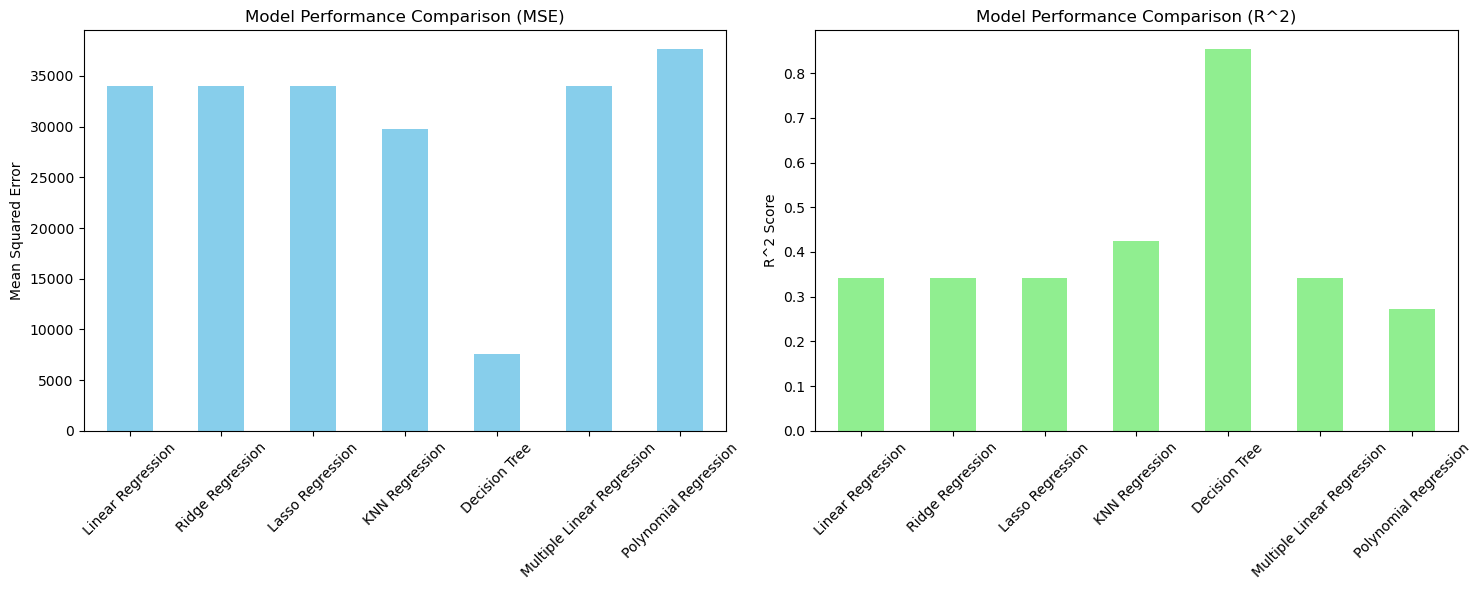

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
file_path = r'D:\Machine learning\task\data\Sales_Product_Price_by_Store.csv'
data = pd.read_csv(file_path)

# Convert 'Date' column to datetime format
data['Date'] = pd.to_datetime(data['Date'])

# Extract features from 'Date' (optional)
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data = data.drop(columns=['Date'])  # Drop the original date column

# One-hot encode the 'Is_Holiday' column
data = pd.get_dummies(data, columns=['Is_Holiday'], drop_first=True)

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
target_column = 'Weekly_Units_Sold'
X = data.drop(columns=[target_column])
y = data[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[model_name] = {'MSE': mse, 'R^2': r2}
    print(f"{model_name} - MSE: {mse:.2f}, R^2: {r2:.2f}")

# # Simple Linear Regression (using one feature)
# chosen_feature = 'Price'  # Change this to an actual feature name
# simple_model = LinearRegression()
# simple_model.fit(X_train[[chosen_feature]], y_train)
# y_pred_simple = simple_model.predict(X_test[[chosen_feature]])
# mse_simple = mean_squared_error(y_test, y_pred_simple)
# r2_simple = r2_score(y_test, y_pred_simple)
# results['Simple Linear Regression'] = {'MSE': mse_simple, 'R^2': r2_simple}
# print(f"Simple Linear Regression - MSE: {mse_simple:.2f}, R^2: {r2_simple:.2f}")

# Multiple Linear Regression (using all features)
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)
chosen_feature = 'Price'  # Ensure this feature exists in the dataset
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
results['Multiple Linear Regression'] = {'MSE': mse_multiple, 'R^2': r2_multiple}
print(f"Multiple Linear Regression - MSE: {mse_multiple:.2f}, R^2: {r2_multiple:.2f}")

# Polynomial Regression
degree = 2  # Adjust the degree of the polynomial as needed
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train[[chosen_feature]])  # Use the chosen feature
X_poly_test = poly.transform(X_test[[chosen_feature]])
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
results['Polynomial Regression'] = {'MSE': mse_poly, 'R^2': r2_poly}
print(f"Polynomial Regression (degree={degree}) - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Prepare for plotting results
results_df = pd.DataFrame(results).T

# Plotting
plt.figure(figsize=(15, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
results_df['MSE'].plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Model Performance Comparison (MSE)')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Bar plot for R^2
plt.subplot(1, 2, 2)
results_df['R^2'].plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Model Performance Comparison (R^2)')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Linear Regression - MSE: 33993.37, R^2: 0.34
Ridge Regression - MSE: 33992.33, R^2: 0.34
Lasso Regression - MSE: 33961.24, R^2: 0.34
Decision Tree - MSE: 6977.16, R^2: 0.86
Best parameters for KNN: {'n_neighbors': 7, 'weights': 'uniform'}
KNN Regression - MSE: 26305.36, R^2: 0.49
Polynomial Regression (degree=2) - MSE: 37608.69, R^2: 0.27


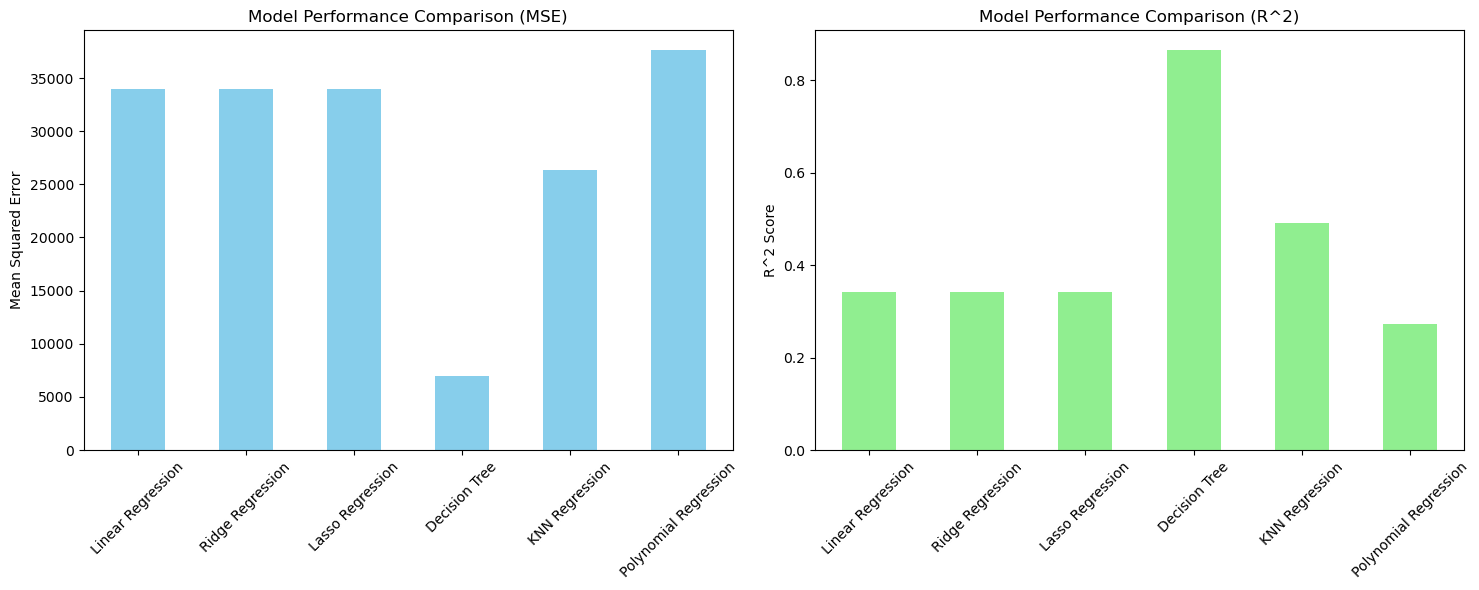

### Features
- **Age**: Represents the age of the individuals in the dataset. It may influence purchasing behavior, as different age groups may have varying preferences and spending habits.
  
- **EstimatedSalary**: Indicates the estimated salary of the individuals. Higher salaries might correlate with a greater likelihood of making purchases, as individuals with more disposable income can afford to buy more.

### Target Value
- **Purchased**: A binary variable indicating whether or not an individual made a purchase (typically represented as 0 for "No" and 1 for "Yes"). This is the outcome we aim to predict based on the features.



Data from first dataset:
              Age  EstimatedSalary   Purchased
count  400.000000       400.000000  400.000000
mean    37.655000     69742.500000    0.357500
std     10.482877     34096.960282    0.479864
min     18.000000     15000.000000    0.000000
25%     29.750000     43000.000000    0.000000
50%     37.000000     70000.000000    0.000000
75%     46.000000     88000.000000    1.000000
max     60.000000    150000.000000    1.000000

Correlation Matrix for first dataset:
                      Age  EstimatedSalary  Purchased
Age              1.000000         0.155238   0.622454
EstimatedSalary  0.155238         1.000000   0.362083
Purchased        0.622454         0.362083   1.000000
Linear Regression (Dataset 1) - MSE: 0.10, R^2: 0.56
Ridge Regression (Dataset 1) - MSE: 0.10, R^2: 0.56
Lasso Regression (Dataset 1) - MSE: 0.12, R^2: 0.46
KNN Regression (Dataset 1) - MSE: 0.14, R^2: 0.40
Decision Tree (Dataset 1) - MSE: 0.16, R^2: 0.29
Multiple Linear Regression - MSE: 0.10, 

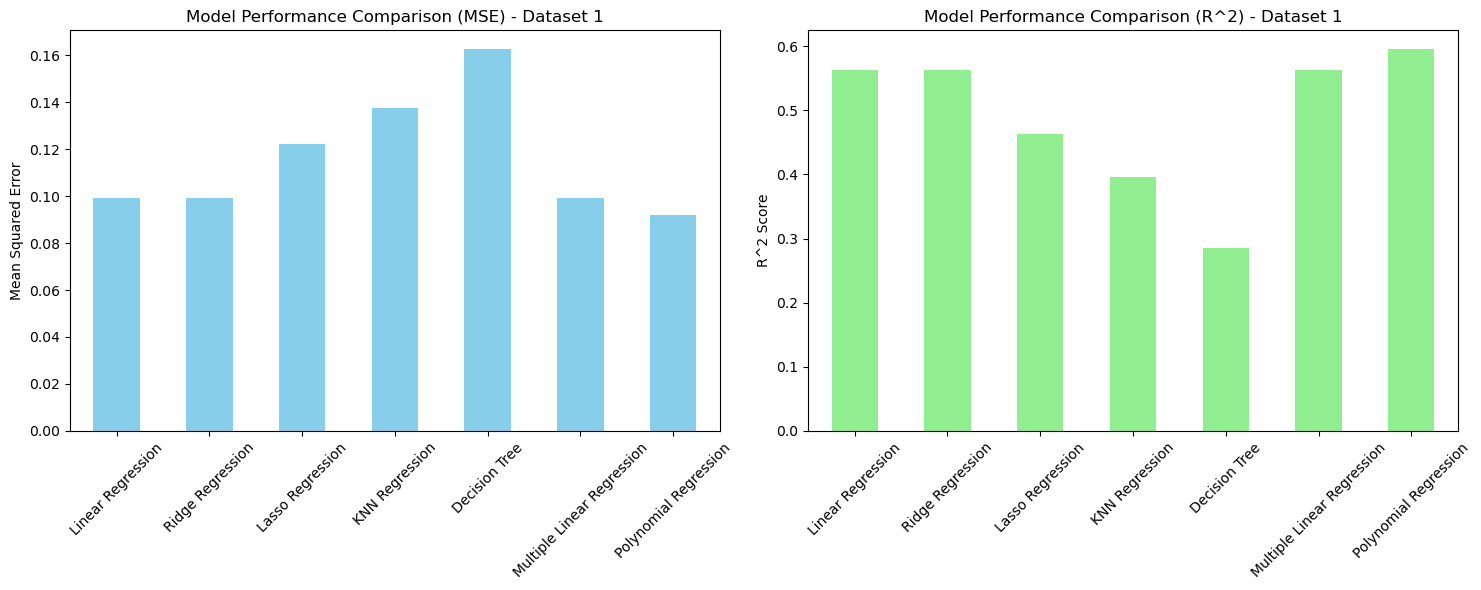

In [6]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the first dataset
file_path_1 = r'D:\Machine learning\task\data\Social_Network_Ads.csv'  # Replace with your actual file path
data = pd.read_csv(file_path_1)

# Display descriptive statistics and correlation matrix for the dataset
print("\nData from first dataset:")
print(data.describe())
print("\nCorrelation Matrix for first dataset:")
print(data.corr())

# Drop rows with missing values
data = data.dropna()

# Select features and target variable
target_column = 'Purchased'  # Replace with your actual target column name
X1 = data.drop(columns=[target_column])  # Features
y1 = data[target_column]  # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results1 = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)

    mse1 = mean_squared_error(y_test, y_pred1)
    r21 = r2_score(y_test, y_pred1)
    results1[model_name] = {'MSE': mse1, 'R^2': r21}
    print(f"{model_name} (Dataset 1) - MSE: {mse1:.2f}, R^2: {r21:.2f}")

# # Simple Linear Regression (using one feature)
# chosen_feature = 'Age'  # Replace with an actual feature name from the dataset
# simple_model = LinearRegression()
# simple_model.fit(X_train[[chosen_feature]], y_train)
# y_pred_simple = simple_model.predict(X_test[[chosen_feature]])
# mse_simple = mean_squared_error(y_test, y_pred_simple)
# r2_simple = r2_score(y_test, y_pred_simple)
# results1['Simple Linear Regression'] = {'MSE': mse_simple, 'R^2': r2_simple}
# print(f"Simple Linear Regression - MSE: {mse_simple:.2f}, R^2: {r2_simple:.2f}")

# Multiple Linear Regression (using all features)
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)
chosen_feature = 'Age'  # Replace with an actual feature name from the dataset
if chosen_feature not in X_train.columns:
    raise KeyError(f"'{chosen_feature}' not found in the columns of X_train")

mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
results1['Multiple Linear Regression'] = {'MSE': mse_multiple, 'R^2': r2_multiple}
print(f"Multiple Linear Regression - MSE: {mse_multiple:.2f}, R^2: {r2_multiple:.2f}")

# Polynomial Regression (using one feature)
degree = 2  # Adjust the degree of the polynomial as needed
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train[[chosen_feature]])  # Use the chosen feature
X_poly_test = poly.transform(X_test[[chosen_feature]])
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
results1['Polynomial Regression'] = {'MSE': mse_poly, 'R^2': r2_poly}
print(f"Polynomial Regression (degree={degree}) - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Prepare for plotting results
results_df1 = pd.DataFrame(results1).T

# Plot for dataset 1
plt.figure(figsize=(15, 6))

# Bar plot for MSE
plt.subplot(1, 2, 1)
results_df1['MSE'].plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Model Performance Comparison (MSE) - Dataset 1')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Bar plot for R^2
plt.subplot(1, 2, 2)
results_df1['R^2'].plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Model Performance Comparison (R^2) - Dataset 1')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


### Features
- **MedInc**: Median income in the area.
- **HouseAge**: Age of the house.
- **AveRooms**: Average number of rooms per household.
- **AveBedrms**: Average number of bedrooms per household.
- **Population**: Total population of the area.
- **AveOccup**: Average number of occupants per household.
- **Latitude**: Geographical latitude.
- **Longitude**: Geographical longitude.

### Target Value
- **Price**: The price of the house, which is the outcome we aim to predict.



Data from first dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude         Price  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min   

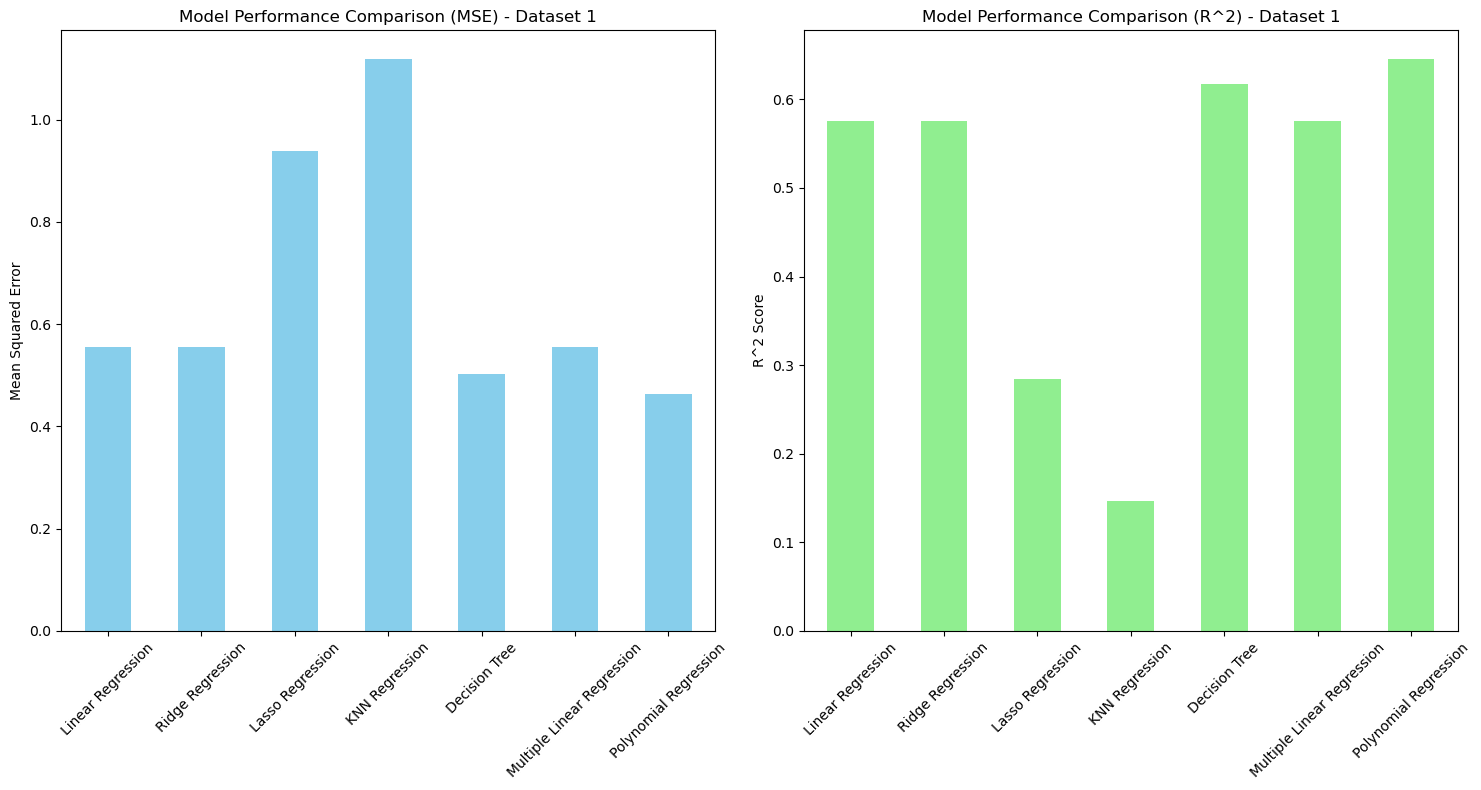

In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load the first dataset
file_path_1 = r'D:\Machine learning\task\data\house_data.csv'  # Replace with your actual file path
data = pd.read_csv(file_path_1)

# Display descriptive statistics and correlation matrix for the first dataset
print("\nData from first dataset:")
print(data.describe())
# print("\nCorrelation Matrix for first dataset:")
# print(data.corr())

# Drop rows with missing values
data = data.dropna()

# Select features and target variable for the first dataset
target_column = 'Price'  # Replace with your actual target column name
X1 = data.drop(columns=[target_column]) # Use target_column instead of sales
y1 = data[target_column] # Use target_column instead of sales


# Split into training and testing sets for the first dataset
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

# Initialize models for the first dataset
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results1 = {}

# Train and evaluate each model for the first dataset
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred1 = model.predict(X_test)

    mse1 = mean_squared_error(y_test, y_pred1)
    # Use y_pred1 instead of y_pred
    r21 = r2_score(y_test, y_pred1)
    results1[model_name] = {'MSE': mse1, 'R^2': r21}
    print(f"{model_name} (Dataset 1) - MSE: {mse1:.2f}, R^2: {r21:.2f}")

# Multiple Linear Regression (Using all features)
multiple_model = LinearRegression()
multiple_model.fit(X_train, y_train)
y_pred_multiple = multiple_model.predict(X_test)
mse_multiple = mean_squared_error(y_test, y_pred_multiple)
r2_multiple = r2_score(y_test, y_pred_multiple)
results1['Multiple Linear Regression'] = {'MSE': mse_multiple, 'R^2': r2_multiple}
print(f"Multiple Linear Regression - MSE: {mse_multiple:.2f}, R^2: {r2_multiple:.2f}")

# Polynomial Regression
degree = 2  # Adjust the degree of the polynomial as needed
poly = PolynomialFeatures(degree=degree)
X_poly_train = poly.fit_transform(X_train)  # Use all features
X_poly_test = poly.transform(X_test)
poly_model = LinearRegression()
poly_model.fit(X_poly_train, y_train)
y_pred_poly = poly_model.predict(X_poly_test)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
results1['Polynomial Regression'] = {'MSE': mse_poly, 'R^2': r2_poly}
print(f"Polynomial Regression (degree={degree}) - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Prepare for plotting results
results_df1 = pd.DataFrame(results1).T

# Plot for dataset 1
plt.figure(figsize=(15, 8))

# Bar plot for MSE
plt.subplot(1, 2, 1)
results_df1['MSE'].plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Model Performance Comparison (MSE) - Dataset 1')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Bar plot for R^2
plt.subplot(1, 2, 2)
results_df1['R^2'].plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Model Performance Comparison (R^2) - Dataset 1')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Features
- **R&D Spend**: Amount spent on research and development.
- **Administration**: Amount spent on administration.
- **Marketing Spend**: Amount spent on marketing.
- **State**: The location of the company.

### Target Value
- **Profit**: The profit generated by the company, which is the outcome we aim to predict.



Data from first dataset:
           R&D Spend  Administration  Marketing Spend         Profit
count      50.000000       50.000000        50.000000      50.000000
mean    73721.615600   121344.639600    211025.097800  112012.639200
std     45902.256482    28017.802755    122290.310726   40306.180338
min         0.000000    51283.140000         0.000000   14681.400000
25%     39936.370000   103730.875000    129300.132500   90138.902500
50%     73051.080000   122699.795000    212716.240000  107978.190000
75%    101602.800000   144842.180000    299469.085000  139765.977500
max    165349.200000   182645.560000    471784.100000  192261.830000

Categorical Columns: Index(['State'], dtype='object')
Linear Regression (Dataset) - MSE: 82010363.04, R^2: 0.90
Ridge Regression (Dataset) - MSE: 81887773.66, R^2: 0.90
Lasso Regression (Dataset) - MSE: 82004202.15, R^2: 0.90
KNN Regression (Dataset) - MSE: 570983489.76, R^2: 0.29
Decision Tree (Dataset) - MSE: 147501362.20, R^2: 0.82
Simple Linear R

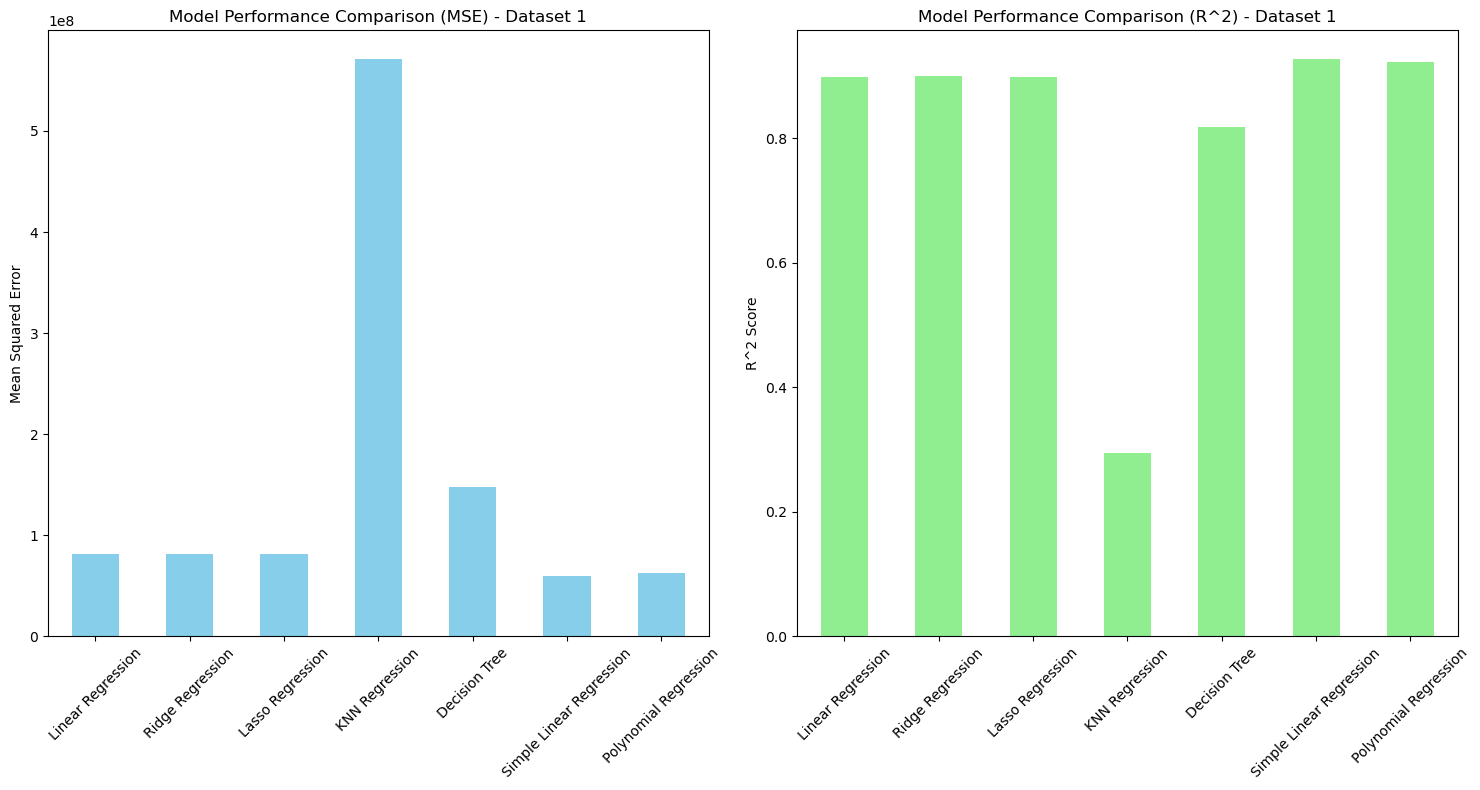

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

# Load the dataset
file_path = r'D:\Machine learning\task\data\50_Startups (1).csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Display descriptive statistics
print("\nData from first dataset:")
print(data.describe())

# Drop rows with missing values
data = data.dropna()

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns
print("\nCategorical Columns:", categorical_cols)

# One-hot encode categorical variables
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Select features and target variable
target_column = 'Profit'
X = data.drop(columns=[target_column])
y = data[target_column]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'KNN Regression': KNeighborsRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

results1 = {}

# Train and evaluate each model
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results1[model_name] = {'MSE': mse, 'R^2': r2}
    print(f"{model_name} (Dataset) - MSE: {mse:.2f}, R^2: {r2:.2f}")

# Add Simple Linear Regression
simple_model = LinearRegression()
simple_model.fit(X_train[['R&D Spend']], y_train)  # Example feature
y_pred_simple = simple_model.predict(X_test[['R&D Spend']])
mse_simple = mean_squared_error(y_test, y_pred_simple)
r2_simple = r2_score(y_test, y_pred_simple)
results1['Simple Linear Regression'] = {'MSE': mse_simple, 'R^2': r2_simple}
print(f"Simple Linear Regression - MSE: {mse_simple:.2f}, R^2: {r2_simple:.2f}")

# Add Polynomial Regression
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_train[['R&D Spend']])
poly_model = LinearRegression()
poly_model.fit(X_poly, y_train)

X_test_poly = poly.transform(X_test[['R&D Spend']])
y_pred_poly = poly_model.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
results1['Polynomial Regression'] = {'MSE': mse_poly, 'R^2': r2_poly}
print(f"Polynomial Regression - MSE: {mse_poly:.2f}, R^2: {r2_poly:.2f}")

# Prepare for plotting results
results_df1 = pd.DataFrame(results1).T

# Plot for dataset 1
plt.figure(figsize=(15, 8))

# Bar plot for MSE
plt.subplot(1, 2, 1)
results_df1['MSE'].plot(kind='bar', color='skyblue', ax=plt.gca())
plt.title('Model Performance Comparison (MSE) - Dataset 1')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)

# Bar plot for R^2
plt.subplot(1, 2, 2)
results_df1['R^2'].plot(kind='bar', color='lightgreen', ax=plt.gca())
plt.title('Model Performance Comparison (R^2) - Dataset 1')
plt.ylabel('R^2 Score')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()
